# Data Analyst with Python Project

# Exploring NYC Public School Test Results Scores

## <span style="color:red;"> Project Instructions</span>

Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a **10% significance level**.

For this analysis, you'll use Official `FIFA World Cup` matches since `2002-01-01`, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called `result_dict` in the form:

`result_dict = {"p_val": p_val, "result": result}`

where `p_val` is the p-value and `result` is either the string `"fail to reject"` or `"reject"`, depending on the result of the test.

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [5]:
#!pip install pingouin

In [6]:
# Start your code here!
import pandas as pd

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

In [7]:
#Read men and women data

men = pd.read_csv(r"C:\Users\wende\Desktop\DataCamp\Data Analyst with Python\16 Hypothesis Testing with Men's and Women's Soccer Matches\workspace\men_results.csv")
women = pd.read_csv(r"C:\Users\wende\Desktop\DataCamp\Data Analyst with Python\16 Hypothesis Testing with Men's and Women's Soccer Matches\workspace\women_results.csv")

In [8]:
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [9]:
#inspecting tournament columns
men["tournament"].value_counts()

tournament
Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: count, Length: 141, dtype: int64

In [10]:
women.head(3)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro


In [11]:
#inspecting tournament columns
women["tournament"].value_counts()

tournament
UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20

In [12]:
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB


In [13]:
#filtering for date

#using pd.to_datetime to change dtype from object to datetime64[ns]
men["date"]=pd.to_datetime(men["date"])
men.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  44353 non-null  int64         
 1   date        44353 non-null  datetime64[ns]
 2   home_team   44353 non-null  object        
 3   away_team   44353 non-null  object        
 4   home_score  44353 non-null  int64         
 5   away_score  44353 non-null  int64         
 6   tournament  44353 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 2.4+ MB


In [14]:
#subsetting date from 2002-01-01
men_date = men[men["date"] > "2002-01-01"]

In [15]:
#subsetting tournament column with FIFA World Cup 

men[men["tournament"] == "FIFA World Cup"]

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1311,1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup
1312,1312,1930-07-13,France,Mexico,4,1,FIFA World Cup
1313,1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup
1314,1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup
1315,1315,1930-07-15,Argentina,France,1,0,FIFA World Cup
...,...,...,...,...,...,...,...
44343,44343,2022-12-10,England,France,1,2,FIFA World Cup
44345,44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup
44346,44346,2022-12-14,France,Morocco,2,0,FIFA World Cup
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup


### <i>pandas.DataFrame.isin()</i>

DataFrame.isin(values)

Whether each element in the DataFrame is contained in values.

**<u> returns boolean**

##### <span style="color:blue;"> Testing start</span>

In [18]:
men["tournament"].isin(["FIFA World Cup"])

0        False
1        False
2        False
3        False
4        False
         ...  
44348    False
44349    False
44350     True
44351    False
44352     True
Name: tournament, Length: 44353, dtype: bool

##### <span style="color:blue;"> Testing end</span>

In [20]:
#combining subset date from 2002-01-01 and men tournament = FIFA World Cup

men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
men_subset.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [21]:
#combining subset date from 2002-01-01 and women tournament = FIFA World Cup

women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]
women_subset.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


In [29]:
#  optional to run below
#pd.options.mode.copy_on_write = True

In [54]:
# Create new coloumn for group = men and women

men_subset["group"] = "men"
women_subset["group"] = "women"

In [62]:
# Create new coloumn for combined scores (home+away)

men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

In [66]:
#preview
men_subset.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,men,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,men,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,men,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,men,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,men,1


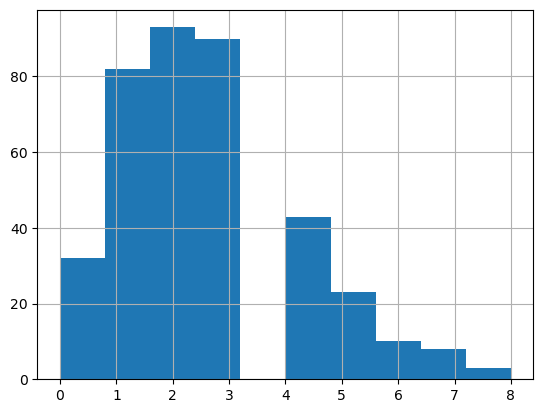

<Figure size 640x480 with 0 Axes>

In [76]:
#Determine normality using histograms
men_subset["goals_scored"].hist()
plt.show()
plt.clf();

**From the histogram above, the disribution is not normally distributed so we need to use**

#### <u>Wilcoxon-Mann-Whitney test of two groups

In [103]:
#Combining both women and men data and calculate goals scored in each match

both = pd.concat([women_subset,men_subset],axis=0,ignore_index=True)
both.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
0,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
2,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
3,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
4,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


In [119]:
# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test

#assigning "group","goals_scored" columns to both_subset
both_subset = both[["group","goals_scored"]]
both_subset

,group,goals_scored
0,women,3
1,women,2
2,women,5
3,women,6
4,women,4
...,...,...
579,men,3
580,men,3
581,men,2
582,men,3


In [121]:
#using pivot table and notice the difference
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")
both_subset_wide

group,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0
...,...,...
579,3.0,NaN
580,3.0,NaN
581,2.0,NaN
582,3.0,NaN


In [125]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg= pingouin.mwu(x=both_subset_wide["women"],
                         y=both_subset_wide["men"],
                        alternative="greater")
results_pg

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


##### <span style="color:green;"> Alternative solution</span>

In [138]:
# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")
results_scipy 

MannwhitneyuResult(statistic=43273.0, pvalue=0.005106609825443641)

In [160]:
##Extracting p-value
p_val = results_pg["p-val"].values[0]
p_val

0.005106609825443641

In [164]:
# Determine hypothesis test result using sig. level

if p_val <=0.01:
    result = "reject"
else:
    result="fail to reject"
    
result_dict = {"p_val": p_val, "result": result}
print(result_dict)

{'p_val': 0.005106609825443641, 'result': 'reject'}


## <span style="color:red;"> DataCamp solution</span>

In [24]:
# Start your code here!
import pandas as pd

# Imports
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

FileNotFoundError: [Errno 2] No such file or directory: 'men_results.csv'